In [13]:
maze = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0, 0, 0,-1, 0, 0, 0,-1,-1, 0,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0,-1,],
        [ 0, 0, 0, 0, 0, 0,-1, 0, 0, 0, 0, 0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0,-1, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1,-1,-1, 0,-1,-1,-1, 0,-1,-1,],
        [-1, 0,-1, 0, 0, 0,-1, 0,-1, 0,-1,-1, 0, 0, 0, 0,-1,-1,-1, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1,-1,-1, 0, 0,-1, 0,-1, 0, 0,-1,-1, 0, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0,-1, 0, 9,-1, 0,-1, 0, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0, 0,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,]]

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0  0 -1  0  0  0 -1 -1  0 -1 -1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0 -1  0  0  0  0 -1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1]
 [-1  0 -1  0  0  0 -1  0 -1  0 -1 -1  0  0  0  0 -1 -1 -1  0  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1  0 -1  0 -1  0  0  0  0  0  0 -1 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  0 -1  0  0 -1 -1  0  0  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  9 -1  0 -1  0  0 -1]
 [-1 -1 -1 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


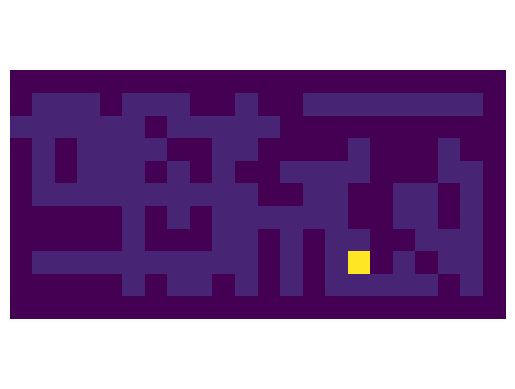

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import time
from IPython.display import display, clear_output

mmaze = np.array(maze)
y_b, x_b = mmaze.shape
print(mmaze)
plt.pcolor(mmaze[-1::-1,:])
plt.axis('equal')
plt.axis('off')
plt.show()

In [15]:
#BFS
import numpy as np
from collections import deque
from scipy.spatial import distance

def maze_to_graph(maze):
    graph = {}
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] != -1:
                graph[(i, j)] = [(x, y) for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)] if maze[x][y] != -1]
    return graph

def bfs(graph, start, end):
    queue = deque([[start]])
    seen = set([start])
    while queue:
        path = queue.popleft()
        vertex = path[-1]
        if vertex == end:
            return path
        for neighbor in graph[vertex]:
            if neighbor not in seen:
                seen.add(neighbor)
                queue.append(path + [neighbor])


In [16]:

start = (2, 0) 
end = (8, 15)  

graph = maze_to_graph(maze)
path = bfs(graph, start, end)

print("Path:", path)

Path: [(2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 14), (8, 14), (8, 15)]


In [17]:
#length conversion and dijkstra

def create_conversion_graph(units, conversions):
    graph = {unit: {} for unit in units}
    for unit1, unit2, rate in conversions:
        graph[unit1][unit2] = rate
        graph[unit2][unit1] = 1 / rate
    return graph

def dijkstra(graph, start, end):
    shortest_paths = {start: (None, 0)}
    current_node = start
    visited = set()
    while current_node != end:
        visited.add(current_node)
        destinations = graph[current_node]
        weight_to_current_node = shortest_paths[current_node][1]
        for next_node, weight in destinations.items():
            weight = weight_to_current_node + weight
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if weight < current_shortest_weight:
                    shortest_paths[next_node] = (current_node, weight)
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    path = path[::-1]
    return path

In [18]:

units = ["miles", "feet", "inches", "yards", "furloughs", "meters", "kilometers", "marathon", "Planck's lengths", "Beard-Second"]
conversions = [
    ("miles", "feet", 5280),
    ("feet", "inches", 12),
    ("yards", "feet", 3),
    ("miles", "furloughs", 8),
    ("meters", "feet", 3.281),
    ("kilometers", "meters", 1000),
    ("marathon", "miles", 26.219),
    ("Planck's lengths", "meters", 1.616255e-35),
    ("Beard-Second", "inches", 5) 

]

graph = create_conversion_graph(units, conversions)
path = dijkstra(graph, "miles", "Planck's lengths")

print("Conversion path:", path)

Conversion path: ['miles', 'feet', 'meters', "Planck's lengths"]
